In [106]:
# IMPORTING A LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

 TITAL : Prediction Model For Income Of Naturalgas  


In [3]:
# IMPORTING THE DATASET
p1=pd.read_csv("C:/Users/HP/Downloads/NaturalGas.csv")
p1

,Unnamed: 0,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
0,1,NY,35,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,2,NY,35,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,3,NY,35,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,4,NY,35,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,5,NY,35,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42
...,...,...,...,...,...,...,...,...,...,...,...
133,134,CA,5,1985,527495,5.72,7.78,30.58,5.84,2694,14368.46
134,135,CA,5,1986,464307,5.14,7.95,44.15,5.72,2192,14580.77
135,136,CA,5,1987,503473,5.26,8.03,35.24,5.14,2502,14915.05
136,137,CA,5,1988,497138,5.64,8.69,34.02,5.26,2366,15340.38


# FILTERING AND ANALYSE THE DATA

In [4]:
# CHECKING THE DTYPES OF EACH COLUMNS
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   138 non-null    int64  
 1   state        138 non-null    object 
 2   statecode    138 non-null    int64  
 3   year         138 non-null    int64  
 4   consumption  138 non-null    int64  
 5   price        138 non-null    float64
 6   eprice       138 non-null    float64
 7   oprice       138 non-null    float64
 8   lprice       138 non-null    float64
 9   heating      138 non-null    int64  
 10  income       138 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 12.0+ KB


In [5]:
# DROPING THE [UNNAMED]COLUMNS BY USING (DF.DROP()) CODE
p1.drop(['Unnamed: 0'],axis=1,inplace=True)


In [6]:
# ENCODING THE OBJECT DTYPE TO INT64 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
p1['state']=le.fit_transform(p1['state'])

In [7]:
# CALCULATE STAT OF EACH COLUMNS
p1.describe()

,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
count,138.000000,138.00000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,2.500000,27.00000,1978.000000,252901.478261,3.422319,5.053551,24.635580,3.207681,4154.528986,11193.235652
std,1.714047,15.68811,6.657415,184478.131559,2.169215,2.577859,15.401018,2.124937,2451.998462,1906.726093
min,0.000000,5.00000,1967.000000,9430.000000,0.680000,1.980000,5.010000,0.680000,481.000000,7465.340000
25%,1.000000,10.00000,1972.000000,49103.500000,1.380000,2.432500,8.240000,1.257500,2081.500000,9637.165000
50%,2.500000,29.00000,1978.000000,300835.500000,2.775000,4.520000,19.865000,2.615000,4272.000000,11367.460000
75%,4.000000,44.00000,1984.000000,346428.750000,5.310000,7.282500,40.102500,5.192500,6498.000000,12125.335000
max,5.000000,45.00000,1989.000000,637289.000000,8.060000,10.860000,51.730000,7.870000,7440.000000,16425.330000


In [8]:
# FIND NULL VALUES
p1.isna().sum()

state          0
statecode      0
year           0
consumption    0
price          0
eprice         0
oprice         0
lprice         0
heating        0
income         0
dtype: int64

In [107]:
p1.corr()

,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
state,1.000000,0.980198,0.000000,-0.487579,-0.119752,-0.008119,-0.068904,-0.119282,0.466906,-0.518112
statecode,0.980198,1.000000,0.000000,-0.354773,-0.112909,0.017690,-0.063556,-0.112457,0.461756,-0.424075
year,0.000000,0.000000,1.000000,-0.019843,0.885261,0.905776,0.840217,0.879380,-0.014169,0.642439
consumption,-0.487579,-0.354773,-0.019843,1.000000,-0.109541,0.045979,0.013371,-0.110035,0.114430,0.558559
price,-0.119752,-0.112909,0.885261,-0.109541,1.000000,0.935463,0.856882,0.985123,-0.142188,0.658469
eprice,-0.008119,0.017690,0.905776,0.045979,0.935463,1.000000,0.875059,0.924900,0.080426,0.709568
oprice,-0.068904,-0.063556,0.840217,0.013371,0.856882,0.875059,1.000000,0.808498,0.002448,0.595618
lprice,-0.119282,-0.112457,0.879380,-0.110035,0.985123,0.924900,0.808498,1.000000,-0.141117,0.663339
heating,0.466906,0.461756,-0.014169,0.114430,-0.142188,0.080426,0.002448,-0.141117,1.000000,-0.090510
income,-0.518112,-0.424075,0.642439,0.558559,0.658469,0.709568,0.595618,0.663339,-0.090510,1.000000


# VISUALIZE THA DATA

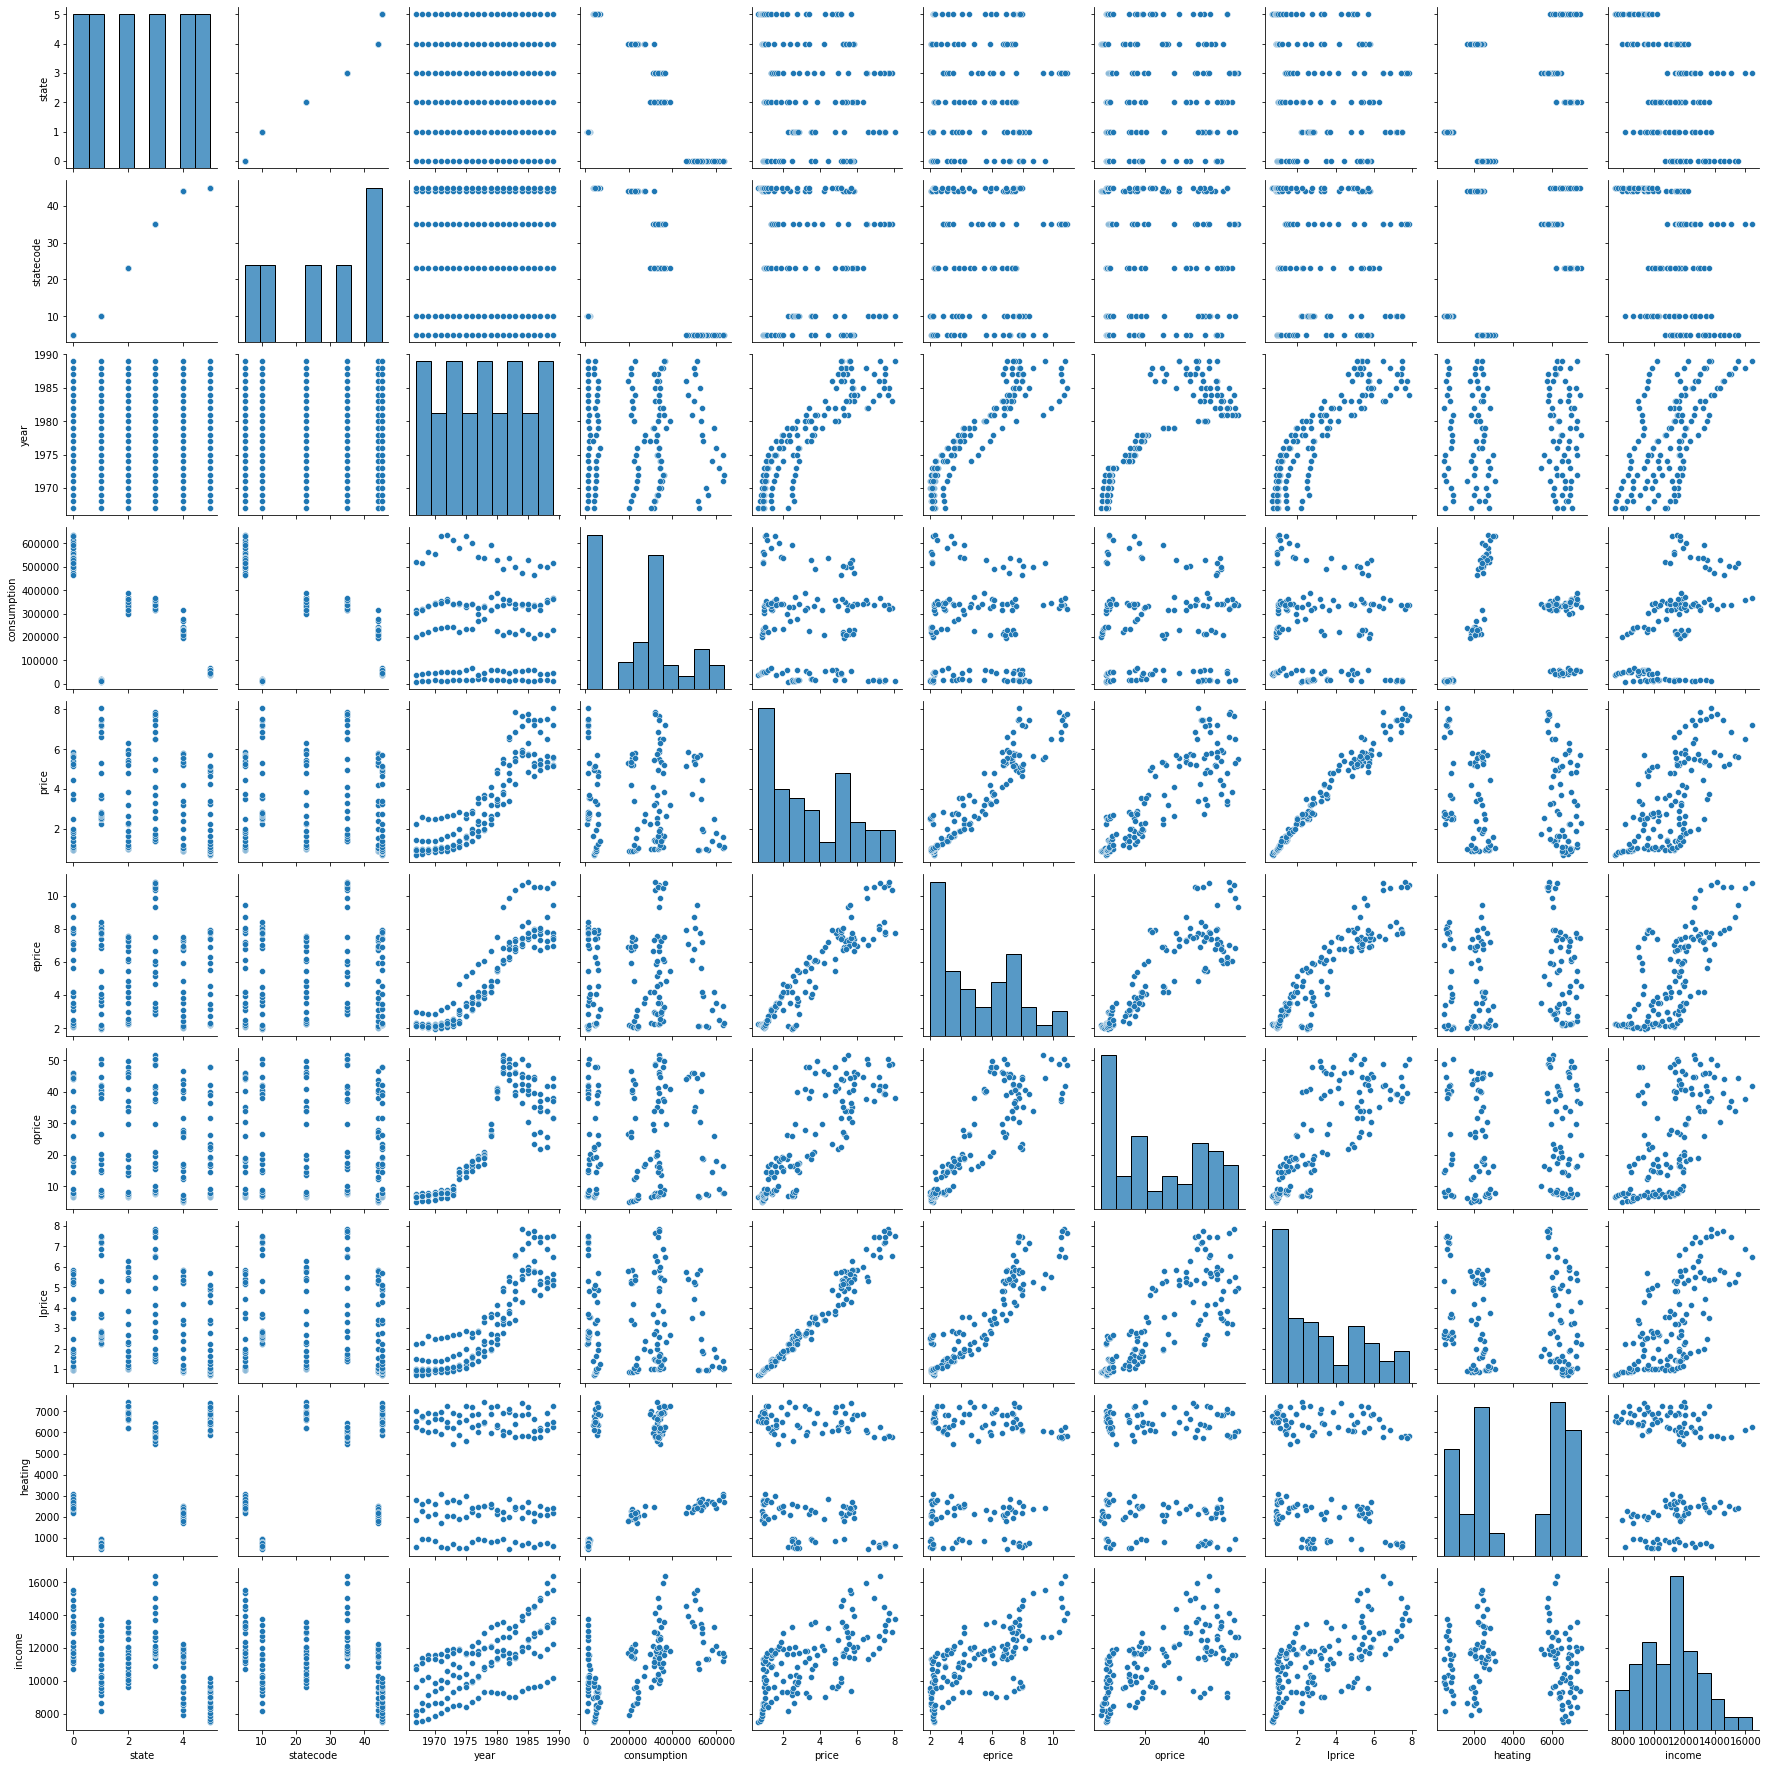

In [9]:
# FIND CORRELATION BETWEEN FEATURES OF DATASET
import seaborn as sns
sns.pairplot(p1)

<AxesSubplot:>

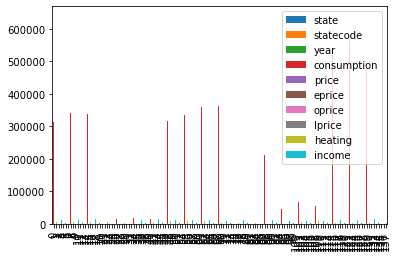

In [104]:
p1.plot(kind='bar')

WE ANALYSE, HAVING A GOOD CORRELATION BETWEEN THE EACH FEATURES OF DATASET

In [10]:
p1.columns

Index(['state', 'statecode', 'year', 'consumption', 'price', 'eprice',
       'oprice', 'lprice', 'heating', 'income'],
      dtype='object')

In [11]:
p1.shape

(138, 10)

In [15]:
# SPLIT THE DATA
x=p1.iloc[:,0:9]
y=p1.iloc[:,-1]

In [16]:
x.shape

(138, 9)

In [17]:
x

,state,statecode,year,consumption,price,eprice,oprice,lprice,heating
0,3,35,1967,313656,1.42,2.98,7.40,1.47,6262
1,3,35,1968,319282,1.38,2.91,7.77,1.42,6125
2,3,35,1969,331326,1.37,2.84,7.96,1.38,6040
3,3,35,1970,346533,1.40,2.87,8.33,1.37,6085
4,3,35,1971,352085,1.50,3.07,8.80,1.40,5907
...,...,...,...,...,...,...,...,...,...
133,0,5,1985,527495,5.72,7.78,30.58,5.84,2694
134,0,5,1986,464307,5.14,7.95,44.15,5.72,2192
135,0,5,1987,503473,5.26,8.03,35.24,5.14,2502
136,0,5,1988,497138,5.64,8.69,34.02,5.26,2366


In [18]:
y

0      10903.75
1      11370.02
2      11578.68
3      11586.77
4      11657.42
         ...   
133    14368.46
134    14580.77
135    14915.05
136    15340.38
137    15532.93
Name: income, Length: 138, dtype: float64

#  MODEL BUILDING

In [19]:
# PREPAREING THE MODEL ON BASIS OF 80% TRAIN DATA
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
model_1 = LinearRegression().fit(xtrain,ytrain)

In [20]:
print(model_1.score(xtrain,ytrain))
print(model_1.score(xtest,ytest))

0.9152561691462882
0.8946983129165238


In [21]:
# BUILD A MODEL BY USING ORDINARY LEAST SQUARES REGRESSION METHOD
import statsmodels.formula.api as smf 
Model_2 = smf.ols('y~x',data=p1).fit()
print(Model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     151.3
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           8.96e-64
Time:                        17:21:27   Log-Likelihood:                -1068.3
No. Observations:                 138   AIC:                             2157.
Df Residuals:                     128   BIC:                             2186.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.998e+05   4.18e+04     -4.779      0.0

In [82]:
# USE POLYNOMIAL METHOD FOR OVER FITTING THE MODEL
from sklearn.preprocessing import PolynomialFeatures
xpoly=PolynomialFeatures(degree=2).fit_transform(x)

In [83]:
xpolytrain,xpolytest,ytrain,ytest=train_test_split(xpoly,y,test_size=0.3)
Model_3 = LinearRegression().fit(xpolytrain,ytrain)

In [84]:
print(Model_3.score(xpolytrain,ytrain))
print(Model_3.score(xpolytest,ytest))

0.9902664374466292
0.9239697450998011


In [85]:
import statsmodels.formula.api as smf 
Model_4 = smf.ols('y~xpoly',data=p1).fit()
print(Model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     172.1
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           2.91e-70
Time:                        17:30:11   Log-Likelihood:                -922.11
No. Observations:                 138   AIC:                             1944.
Df Residuals:                      88   BIC:                             2091.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -955.0245    292.216     -3.268      0.0

In [88]:
pred=Model_4.predict(x)

In [90]:
M1pred=model_1.predict(x)


In [95]:
M3pred=Model_3.predict(xpoly)

# PREDICTION ANALYZED OF MODELS

In [96]:
df=pd.DataFrame({'Atual':y,'Predict_1':M1pred,'predict_3':M3pred,'predict_4':pred})
df

,Atual,Predict_1,predict_3,predict_4
0,10903.75,10327.578690,10866.869276,10834.900799
1,11370.02,10397.223832,11179.551569,11066.762286
2,11578.68,10464.544382,11438.316243,11347.440069
3,11586.77,10576.560585,11677.198068,11618.287564
4,11657.42,10727.310793,11683.628101,11621.455356
...,...,...,...,...
133,14368.46,14314.870762,14222.016221,14129.005136
134,14580.77,14477.585296,14889.938299,14658.026636
135,14915.05,14640.852395,14736.371520,14893.318589
136,15340.38,14940.948951,15293.982123,15443.079431


In [97]:
df.columns

Index(['Atual', 'Predict_1', 'predict_3', 'predict_4'], dtype='object')

<AxesSubplot:ylabel='Frequency'>

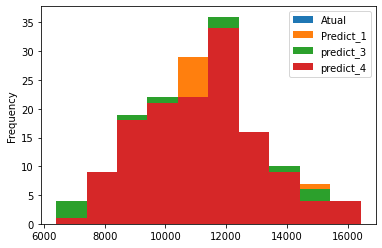

In [98]:
df.plot(kind='hist')

<AxesSubplot:>

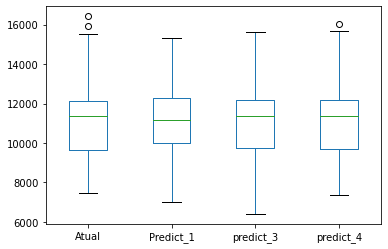

In [100]:
df.plot(kind='box')

In [102]:
#       train_D   test_D
# MODEL_1= 91%    89%
# MODEL_2= 91%  Radj=90%
# MODEL_3= 99%    92.3%
# MODEL_4= 99%  Radj=98% 

CONCLUSION : WE ANALYZED THE MODELS BY MATHEMATICALLY AND STATISTICALLY MODEL_3 IS BEST FIT MODEL FOR FEATURE PREDICTION AS
            COMPARE TO OTHER MODELS.
            MODEL_3 GIVE THE 99.0% ACCURACY ON TRAIN DATA AND 92.3% ACCURACY ON TEST DATA.